Step 1. Follow along with the tutorial to gain an understanding of the process

Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [34]:
# Load QMNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='QMNIST_data/', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='QMNIST_data/', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

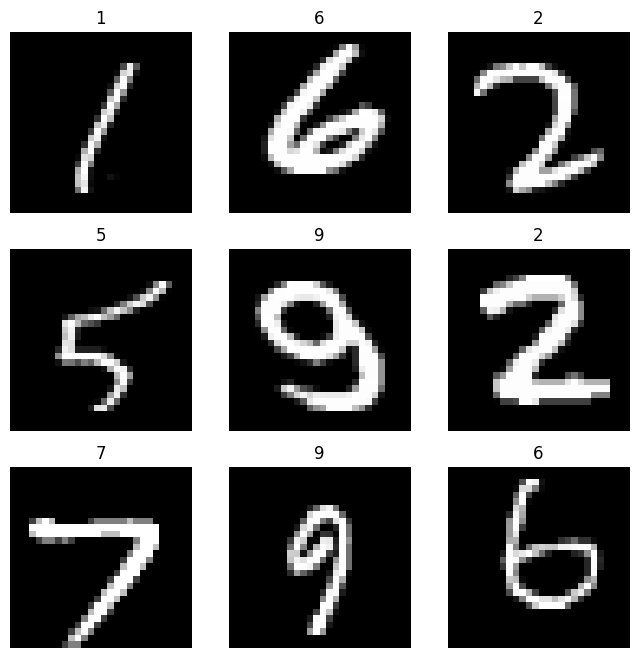

In [35]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

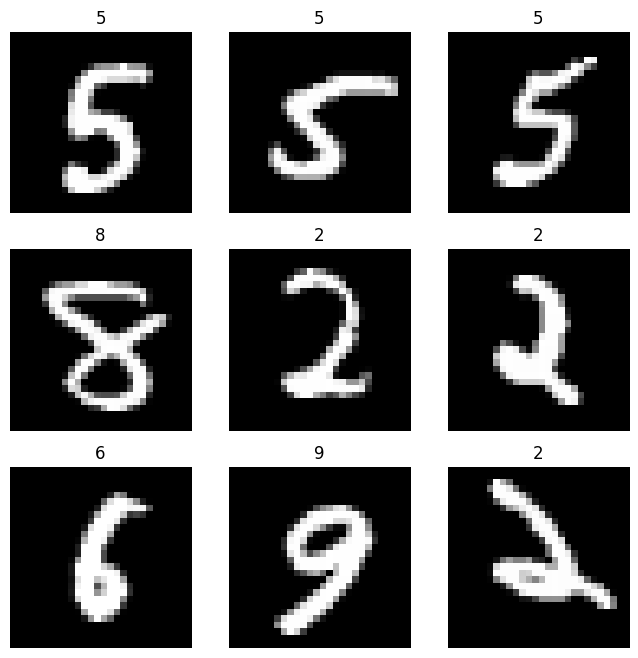

In [36]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [37]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()


In [38]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.9798232951760292
Epoch 1, Batch 200, Loss: 0.4579325929284096
Epoch 1, Batch 300, Loss: 0.3841550649702549
Epoch 1, Batch 400, Loss: 0.34215950101614
Epoch 1, Batch 500, Loss: 0.32385563388466837
Epoch 1, Batch 600, Loss: 0.29763180047273635
Epoch 1, Batch 700, Loss: 0.26745759598910807
Epoch 1, Batch 800, Loss: 0.2445646257698536
Epoch 1, Batch 900, Loss: 0.23267857000231743
Epoch 2, Batch 100, Loss: 0.20735993169248104
Epoch 2, Batch 200, Loss: 0.21314612857997417
Epoch 2, Batch 300, Loss: 0.21285061314702033
Epoch 2, Batch 400, Loss: 0.18714780773967504
Epoch 2, Batch 500, Loss: 0.1925068247318268
Epoch 2, Batch 600, Loss: 0.16393499974161385
Epoch 2, Batch 700, Loss: 0.17857743393629788
Epoch 2, Batch 800, Loss: 0.16183744912967085
Epoch 2, Batch 900, Loss: 0.1609484711289406
Epoch 3, Batch 100, Loss: 0.13963684279471636
Epoch 3, Batch 200, Loss: 0.1442509388923645
Epoch 3, Batch 300, Loss: 0.14970283214002847
Epoch 3, Batch 400, Loss: 0.1272481068596244

Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

In [39]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { (correct / total)*100}%')

Accuracy on train set: 97.27%


In [40]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)*100}%')

Accuracy on test set: 96.30166666666666%


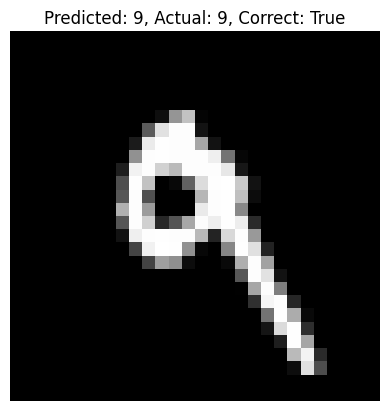

In [41]:
model.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[7], labels[7]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model(image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

Step 4. Choose one of the proposed modifications below:

Add another Dense layer of 128 nodes

Increase the current number of nodes in the layer to 256

Hypothesize how it would change the performance results

Addition of another Dense Layer of 128 nodes

Hypothesis: Introducing an extra dense layer with 128 nodes is anticipated to augment the model's capability to discern more intricate attributes in the input data, thereby potentially enhancing its capacity to learn. Such a modification could lead to improved accuracy on the training dataset as the model may better adapt to the data specifics. However, this adjustment carries the potential for overfitting, characterized by high performance on training data but diminished effectiveness on novel, unseen data due to the model's adaptation to the training set's specificities rather than general patterns. Therefore, it is essential to vigilantly observe for signs of overfitting and consider implementing regularization strategies to ensure the model retains its ability to generalize well to new data.

Step 5. Modify the model based on the chosen method and train

In [42]:
class MLP_Modified_AddLayer(nn.Module):
    def __init__(self):
        super(MLP_Modified_AddLayer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc2_5 = nn.Linear(64, 128)  # Additional layer
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc2_5(x))  # Pass through the new layer
        x = self.fc3(x)
        return x

model1 = MLP_Modified_AddLayer()

In [43]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1131251990795135
Epoch 1, Batch 200, Loss: 0.47118233948946
Epoch 1, Batch 300, Loss: 0.37060015425086024
Epoch 1, Batch 400, Loss: 0.34536319255828857
Epoch 1, Batch 500, Loss: 0.29406062938272953
Epoch 1, Batch 600, Loss: 0.29800283364951613
Epoch 1, Batch 700, Loss: 0.2778221750259399
Epoch 1, Batch 800, Loss: 0.2598872036114335
Epoch 1, Batch 900, Loss: 0.22303235985338687
Epoch 2, Batch 100, Loss: 0.21660145185887814
Epoch 2, Batch 200, Loss: 0.20681307293474674
Epoch 2, Batch 300, Loss: 0.18212223567068578
Epoch 2, Batch 400, Loss: 0.18276070058345795
Epoch 2, Batch 500, Loss: 0.18165114536881447
Epoch 2, Batch 600, Loss: 0.17157887250185014
Epoch 2, Batch 700, Loss: 0.16717869002372027
Epoch 2, Batch 800, Loss: 0.1676088609918952
Epoch 2, Batch 900, Loss: 0.14213166322559118
Epoch 3, Batch 100, Loss: 0.13821662876755
Epoch 3, Batch 200, Loss: 0.14004722449928522
Epoch 3, Batch 300, Loss: 0.1356484454870224
Epoch 3, Batch 400, Loss: 0.13466913748532533

Step 6. Report on the results of the modified model and if it matches your hypothesis

In [44]:
# Evaluate the model
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { (correct / total)*100}%')

Accuracy on train set: 97.47%


In [45]:
# Evaluate the model
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)*100}%')

Accuracy on test set: 96.31%


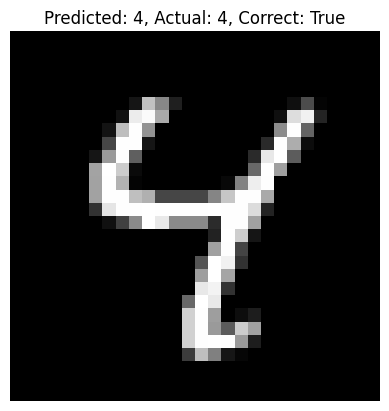

In [46]:
model1.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[6], labels[6]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model1(image.unsqueeze(0))  # Add batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

We acn see that there is an improvement in the accuracy and amodel performance after adding another dense layer.

Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

Adding Dropout layers

In [47]:
class MLP_AddDL(nn.Module):
    def __init__(self):
        super(MLP_AddDL, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.1)  # Dropout layer after first linear layer
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.1)  # Dropout layer after second linear layer
        self.fc2_5 = nn.Linear(64, 128)  # Additional layer
        self.dropout3 = nn.Dropout(0.1)  # Dropout layer after additional layer
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc2_5(x))
        x = self.dropout3(x)
        x = self.fc3(x)
        return x

model2 = MLP_AddDL()

In [48]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.3183617305755615
Epoch 1, Batch 200, Loss: 0.5820943304896354
Epoch 1, Batch 300, Loss: 0.433402486294508
Epoch 1, Batch 400, Loss: 0.3709328681230545
Epoch 1, Batch 500, Loss: 0.32975002147257326
Epoch 1, Batch 600, Loss: 0.317689164429903
Epoch 1, Batch 700, Loss: 0.30779017992317675
Epoch 1, Batch 800, Loss: 0.27824242793023585
Epoch 1, Batch 900, Loss: 0.26265055119991304
Epoch 2, Batch 100, Loss: 0.2352718536555767
Epoch 2, Batch 200, Loss: 0.22617731109261513
Epoch 2, Batch 300, Loss: 0.2309071107208729
Epoch 2, Batch 400, Loss: 0.22203117184340954
Epoch 2, Batch 500, Loss: 0.22733498342335223
Epoch 2, Batch 600, Loss: 0.2190059145539999
Epoch 2, Batch 700, Loss: 0.1992418794706464
Epoch 2, Batch 800, Loss: 0.20057271614670755
Epoch 2, Batch 900, Loss: 0.21032751452177764
Epoch 3, Batch 100, Loss: 0.19339778210967778
Epoch 3, Batch 200, Loss: 0.17254557471722365
Epoch 3, Batch 300, Loss: 0.17785857301205396
Epoch 3, Batch 400, Loss: 0.1766658453643322


In [49]:
# Evaluate the model
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { (correct / total)*100}%')

Accuracy on train set: 96.97%


In [50]:
# Evaluate the model
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)*100}%')

Accuracy on test set: 96.15333333333334%


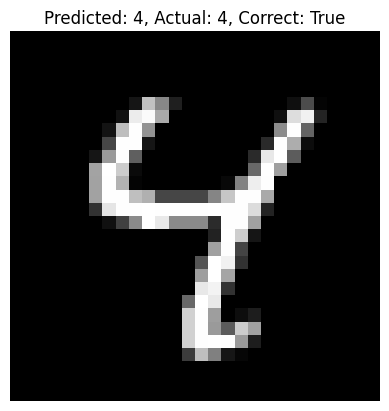

In [51]:
model2.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[6], labels[6]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model2(image.unsqueeze(0))  # Add batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

Adding dropout layer did not increase the accuracy let ous see if i change the optimizer for the above network how will that effect the accuracy.

Changed the optimizer from Adam to RMSprop

In [52]:
class MLP_AddDLO(nn.Module):
    def __init__(self):
        super(MLP_AddDLO, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.1)  # Dropout layer after first linear layer
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.1)  # Dropout layer after second linear layer
        self.fc2_5 = nn.Linear(64, 128)  # Additional layer
        self.dropout3 = nn.Dropout(0.1)  # Dropout layer after additional layer
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc2_5(x))
        x = self.dropout3(x)
        x = self.fc3(x)
        return x

model3 = MLP_AddDLO()

In [53]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model3.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1380456084012984
Epoch 1, Batch 200, Loss: 0.5195123168826103
Epoch 1, Batch 300, Loss: 0.419073311239481
Epoch 1, Batch 400, Loss: 0.3823899030685425
Epoch 1, Batch 500, Loss: 0.3647430490702391
Epoch 1, Batch 600, Loss: 0.3013261403888464
Epoch 1, Batch 700, Loss: 0.2969280735403299
Epoch 1, Batch 800, Loss: 0.29402813464403155
Epoch 1, Batch 900, Loss: 0.26023605044931175
Epoch 2, Batch 100, Loss: 0.25573086641728876
Epoch 2, Batch 200, Loss: 0.23571070246398448
Epoch 2, Batch 300, Loss: 0.24331435814499855
Epoch 2, Batch 400, Loss: 0.2323436389118433
Epoch 2, Batch 500, Loss: 0.2437590702623129
Epoch 2, Batch 600, Loss: 0.2043958891928196
Epoch 2, Batch 700, Loss: 0.21573917832225561
Epoch 2, Batch 800, Loss: 0.19925080839544534
Epoch 2, Batch 900, Loss: 0.20477582827210428
Epoch 3, Batch 100, Loss: 0.2010090672969818
Epoch 3, Batch 200, Loss: 0.1904763448983431
Epoch 3, Batch 300, Loss: 0.1791094172745943
Epoch 3, Batch 400, Loss: 0.19031316351145505
Ep

In [54]:
# Evaluate the model
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { (correct / total)*100}%')

Accuracy on train set: 97.53166666666667%


In [55]:
# Evaluate the model
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)*100}%')

Accuracy on test set: 96.64%


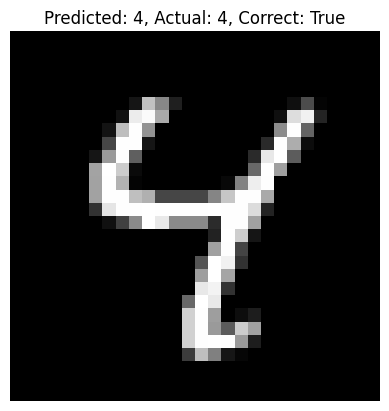

In [56]:
model3.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[6], labels[6]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model3(image.unsqueeze(0))  # Add batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

There is no much difference in the accuracy. The accuracy reduced by few decimals